In [219]:
import numpy as np
from sklearn.preprocessing import normalize
import plotly.express as px
import matplotlib.pyplot as plt

In [220]:
A = np.array([
    [.1, .2, .05, .8, .9, .7, .5, .4, .45],
    [.5, .45, .55, .1, .05, .1, .1, .2, .15],
    [.4, .35, .4, .1, .05, .2, .4, .4, .4]
])

C = np.array([
    [1000, 0, 0],
    [500, 0, 0],
    [2000, 0, 0],
    [0, 500, 0],
    [0, 400, 0],
    [0, 5000, 0],
    [0, 0, 1000],
    [0, 0, 100],
    [0, 0, 500]
])

## Original Matrix

In [221]:
px.imshow(A, width=500)

### Matrix Multiplication

$$I = (C\quad\emptyset\quad\hat{j}C)A$$

In [222]:
C_norm = C / np.array([1 for _ in range(9)]).dot(C)
I = C_norm.dot(A)
px.imshow(I, width=500)

## Iterative Proportional Fitting

Iterate these two steps on P [source](https://www.researchgate.net/publication/336917269_What_is_Iterative_Proportional_Fitting)

$$(1)\quad P_{ij(k+1)}=(\frac{P_{ij(k)}}{\sum_jP_{ij(k)}}) Q_i$$

$$(2)\quad P_{ij(k+2)}=(\frac{P_{ij(k+1)}}{\sum_iP_{ij(k+1)}}) Q_j$$

In [223]:
SEEDER = np.array([
    [1/3, 0, 0],
    [1/3, 0, 0],
    [1/3, 0, 0],
    [0, 1/3, 0],
    [0, 1/3, 0],
    [0, 1/3, 0],
    [0, 0, 1/3],
    [0, 0, 1/3],
    [0, 0, 1/3],
])

SEED = SEEDER.dot(A)
capital_margin = C_norm.sum(axis=1)

In [224]:

for iter in range(10000):

    next_S1 = SEED.copy()
    for i in range(SEED.shape[0]):
        for j in range(SEED.shape[1]):
            next_S1[i,j] = capital_margin[i] * SEED[i,j] / SEED.sum(axis=1)[i]

    next_S2 = next_S1.copy()
    for i in range(SEED.shape[0]):
        for j in range(SEED.shape[1]):
            next_S2[i,j] = next_S1[i,j] / next_S1.sum(axis=0)[j]
    
    SEED = next_S2.copy()

Text(0.5, 1.0, 'Iterative Proportional')

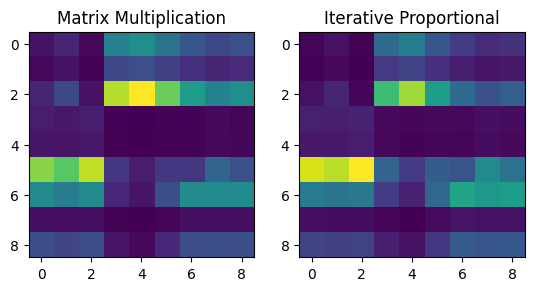

In [225]:
fig, axes = plt.subplots(1,2)

axes[0].imshow(I)
axes[0].set_title("Matrix Multiplication")
axes[1].imshow(SEED)
axes[1].set_title("Iterative Proportional")